In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the data directory
try:
    df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    exit()

# 1. Initial Data Overview =================================
print("\nShape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nChecking for missing values:")
print(df.isnull().sum())

# 2. Understanding Fraud Distribution =================================
print("\nDistribution of Fraudulent vs. Legitimate Transactions:")
fraud_counts = df["isFraud"].value_counts()
print(fraud_counts)

Dataset loaded successfully.

Shape of the dataset: (6362620, 11)

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Checking for missing va

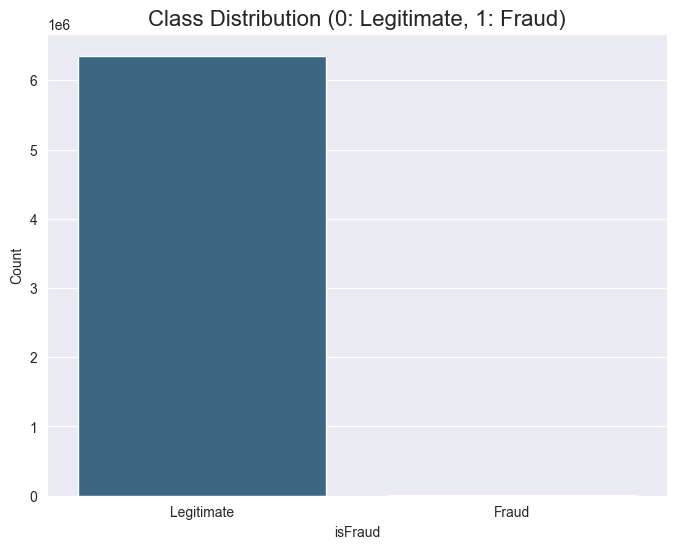


Analyzing transaction types...


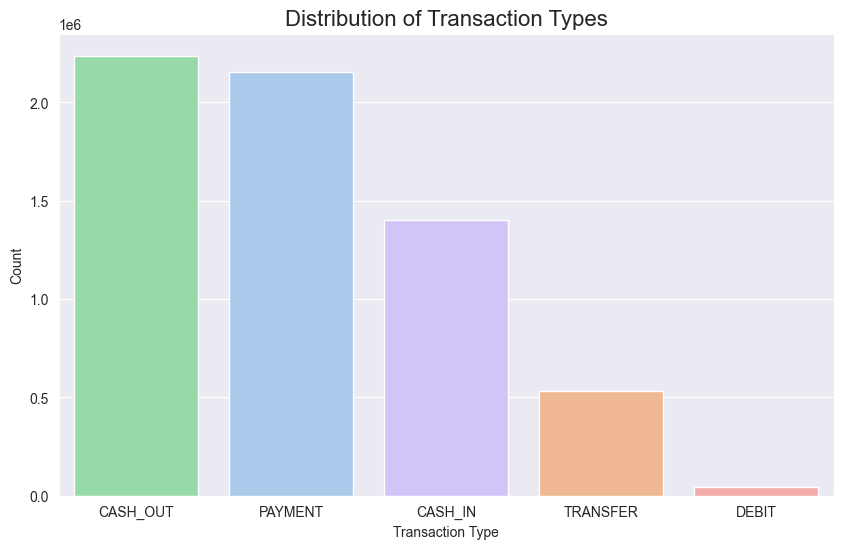


Total number of fraudulent transactions: 8213

Breakdown of fraudulent transaction types:
type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


In [3]:
# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, legend=False, palette="viridis")
plt.title("Class Distribution (0: Legitimate, 1: Fraud)", fontsize=16)
plt.xticks([0, 1], ["Legitimate", "Fraud"])
plt.ylabel("Count")
plt.show()

# 3. Analyzing Transaction Types =================================
print("\nAnalyzing transaction types...")
# What types of transactions are most common?
plt.figure(figsize=(10, 6))
sns.countplot(x="type", data=df, hue="type", legend=False, palette="pastel", order=df['type'].value_counts().index)
plt.title("Distribution of Transaction Types", fontsize=16)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# What types of transactions are actually fraudulent?
fraudulent_transactions = df[df["isFraud"] == 1]
print(f"\nTotal number of fraudulent transactions: {len(fraudulent_transactions)}")
print("\nBreakdown of fraudulent transaction types:")
print(fraudulent_transactions["type"].value_counts())

### Fraud Detection Pattern: Transaction Type Analysis

Fraud exclusively occurs in 'TRANSFER' and 'CASH_OUT' transactions. This is a critical finding that suggests we can potentially
optimize the model by filtering the dataset to focus only on these two transaction types.


In [4]:
# 4. Correlating Features with Fraud =================================
# 'isFlaggedFraud' analysis.
flagged_vs_actual_fraud = pd.crosstab(df.isFlaggedFraud, df.isFraud)
print("\nCorrelation between 'isFlaggedFraud' and actual 'isFraud':")
print(flagged_vs_actual_fraud)


Correlation between 'isFlaggedFraud' and actual 'isFraud':
isFraud               0     1
isFlaggedFraud               
0               6354407  8197
1                     0    16


# Key Insight: Fraud Flag Analysis

The `isFlaggedFraud` feature shows significant limitations:

- It only captures a small subset of actual fraudulent transactions
- The flag is not reliable as a standalone fraud indicator
- This finding validates the need for a more sophisticated machine learning approach to fraud detection
